# Project: Investigate a Dataset FBI GUN DATA SET

<a id='intro'></a>
## Introduction

<hr />

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from `census.gov.`
 >   
 >   - The NICS data is found in one sheet of an .csv file. 
      It contains the number of firearm checks by month, state, and type.
 >     
 >     
 >   - The U.S. census data is found in a .csv file. It contains several
      variables at the state level. Most variables just have one data
      point per state (2016), but a few have data for more than one year.     


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
c = pd.read_csv('/Users/chalee/Desktop/udacity/project data insight/gun data/ncis-and-census-data/U.S. Census Data.csv', sep =',')
g =  pd.read_csv('/Users/chalee/Desktop/udacity/project data insight/gun data/ncis-and-census-data/gun_data.csv', sep =',')

# Data Cleaning (gun_data)


In [3]:
g.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
g.shape

(12485, 27)

In [6]:
g.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [7]:
g.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
c.columns.unique()

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [9]:
# Remove name of the colonies : Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands 
g = g.query(" state not in ['Guam', 'Puerto Rico', 'District of Columbia', 'Virgin Islands', 'Mariana Islands'] ")

In [10]:
g_cap= g.drop([ 'permit', 'permit_recheck','other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1)

In [11]:
g_cap.head()

,month,state,handgun,long_gun,totals
0,2017-09,Alabama,5734.0,6320.0,32019
1,2017-09,Alaska,2320.0,2930.0,6303
2,2017-09,Arizona,11063.0,7946.0,28394
3,2017-09,Arkansas,4347.0,6063.0,17747
4,2017-09,California,37165.0,24581.0,123506


In [12]:
g_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     11350 non-null  object 
 1   state     11350 non-null  object 
 2   handgun   11350 non-null  float64
 3   long_gun  11350 non-null  float64
 4   totals    11350 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 532.0+ KB


In [13]:
#change month to datetime 
g_cap['month'] = pd.to_datetime(g['month'])

In [14]:
g_cap.month.unique()

array(['2017-09-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-06-01

In [15]:
# select all 2010-04-01
g_2010 = g_cap[g_cap['month'] == '2010-04-01']

In [16]:
g_2010.head()

,month,state,handgun,long_gun,totals
4895,2010-04-01,Alabama,8727.0,8095.0,20791
4896,2010-04-01,Alaska,2650.0,3136.0,6411
4897,2010-04-01,Arizona,7787.0,5097.0,16578
4898,2010-04-01,Arkansas,3865.0,3833.0,14563
4899,2010-04-01,California,26170.0,27650.0,80750


In [17]:
g_2010.describe()

,handgun,long_gun,totals
count,50.000000,50.000000,50.0000
mean,6274.780000,6984.900000,24517.7400
std,6873.182889,8145.050054,34280.1673
min,0.000000,0.000000,963.0000
25%,2006.000000,2837.750000,7197.5000
50%,3960.500000,4358.000000,15242.5000
75%,7975.250000,8087.750000,26335.5000
max,26817.000000,49644.000000,211261.0000


In [18]:
# select all 2016-07-01
g_2016 = g_cap[g_cap['month'] == '2016-07-01']
g_2016.head()


,month,state,handgun,long_gun,totals
770,2016-07-01,Alabama,10132.0,7392.0,48927
771,2016-07-01,Alaska,2898.0,2816.0,6793
772,2016-07-01,Arizona,13693.0,8643.0,34496
773,2016-07-01,Arkansas,6323.0,5053.0,19378
774,2016-07-01,California,46361.0,47594.0,190218


In [19]:
# use concat join 2009 and 2017
g_concat = pd.concat([g_2010,g_2016], keys = ['2010-04-01','2016-07-01'],axis = 0)
g_concat.head()

month       state  handgun  long_gun  totals
2010-04-01 4895 2010-04-01     Alabama   8727.0    8095.0   20791
           4896 2010-04-01      Alaska   2650.0    3136.0    6411
           4897 2010-04-01     Arizona   7787.0    5097.0   16578
           4898 2010-04-01    Arkansas   3865.0    3833.0   14563
           4899 2010-04-01  California  26170.0   27650.0   80750

In [20]:
# reset index
g_concat.reset_index(drop=True, inplace=True)

In [21]:
g_concat.head()

,month,state,handgun,long_gun,totals
0,2010-04-01,Alabama,8727.0,8095.0,20791
1,2010-04-01,Alaska,2650.0,3136.0,6411
2,2010-04-01,Arizona,7787.0,5097.0,16578
3,2010-04-01,Arkansas,3865.0,3833.0,14563
4,2010-04-01,California,26170.0,27650.0,80750


# Data Cleaning (cencus_data)

In [22]:
#Drop all NaN and not use in gundata 
c = c.drop(c.index[65: 85]).reset_index()

In [23]:
c = c.drop(['Fact Note'], axis = 1)

In [24]:
# fill na 0
c= c.fillna(0.0)

In [25]:
c.set_index('Fact',inplace=True)
c = c.T.reset_index()

In [26]:
c.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [27]:
#Rename index into state before joining 

c.rename(columns={'index':'state'},inplace = True)
c.head()


Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [28]:
c.columns.unique()

Index(['state', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 20

In [29]:
c_16 = c[['state', 'Population estimates, July 1, 2016,  (V2016)']] 
c_16.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [30]:
#create function to float
def to_float(df, col):
    df[col]=pd.to_numeric(df[col], downcast='float', errors='ignore')    

In [31]:
# replace ',' to ''
c_16['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value= r'',regex=True,inplace=True)

/Users/chalee/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [32]:
# change column to  float by use function
to_float(c_16, 'Population estimates, July 1, 2016,  (V2016)')

/Users/chalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
c_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   state                                         51 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)  51 non-null     float32
dtypes: float32(1), object(1)
memory usage: 740.0+ bytes


In [34]:
c16 = c_16['Population estimates, July 1, 2016,  (V2016)'].sum()
c16

322446370.0

In [35]:
c_10 = c[['state','Population estimates base, April 1, 2010,  (V2016)']]
c_10.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,1
1,Alabama,"4,780,131"
2,Alaska,"710,249"
3,Arizona,"6,392,301"
4,Arkansas,"2,916,025"


In [36]:
c_10.dtypes

Fact
state                                                 object
Population estimates base, April 1, 2010,  (V2016)    object
dtype: object

In [37]:
# replace ',' to ''
c_10['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value= r'',regex=True,inplace=True)

/Users/chalee/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [38]:
# change column to  float  by use function 
to_float(c_10, 'Population estimates base, April 1, 2010,  (V2016)')

/Users/chalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
c_10.dtypes

Fact
state                                                  object
Population estimates base, April 1, 2010,  (V2016)    float32
dtype: object

In [40]:
#reset index
c_16.reset_index(drop = True).head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0.0
1,Alabama,4863300.0
2,Alaska,741894.0
3,Arizona,6931071.0
4,Arkansas,2988248.0


In [41]:
c_10.reset_index(drop = True).head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,1.0
1,Alabama,4780131.0
2,Alaska,710249.0
3,Arizona,6392301.0
4,Arkansas,2916025.0


In [42]:
c10 = c_10['Population estimates base, April 1, 2010,  (V2016)'].sum()
c10

308156380.0

# MERGING CENCUS AND GUNDATA

In [43]:
# RESET INDEX AND SHOW  GUNDATA 2010
g_2010= g_2010.reset_index(drop= True)
g_2010.head()

,month,state,handgun,long_gun,totals
0,2010-04-01,Alabama,8727.0,8095.0,20791
1,2010-04-01,Alaska,2650.0,3136.0,6411
2,2010-04-01,Arizona,7787.0,5097.0,16578
3,2010-04-01,Arkansas,3865.0,3833.0,14563
4,2010-04-01,California,26170.0,27650.0,80750


In [44]:
# RESET INDEX AND SHOW  GUNDATA 2016
g_2016 = g_2016.reset_index(drop= True)
g_2016.head()

,month,state,handgun,long_gun,totals
0,2016-07-01,Alabama,10132.0,7392.0,48927
1,2016-07-01,Alaska,2898.0,2816.0,6793
2,2016-07-01,Arizona,13693.0,8643.0,34496
3,2016-07-01,Arkansas,6323.0,5053.0,19378
4,2016-07-01,California,46361.0,47594.0,190218


In [45]:
g_concat.head()

,month,state,handgun,long_gun,totals
0,2010-04-01,Alabama,8727.0,8095.0,20791
1,2010-04-01,Alaska,2650.0,3136.0,6411
2,2010-04-01,Arizona,7787.0,5097.0,16578
3,2010-04-01,Arkansas,3865.0,3833.0,14563
4,2010-04-01,California,26170.0,27650.0,80750


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Gun per capita 2010-2016)

In [46]:
census_diff = c_10.merge(c_16, on='state', how='left')
census_diff.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,index,1.0,0.0
1,Alabama,4780131.0,4863300.0
2,Alaska,710249.0,741894.0
3,Arizona,6392301.0,6931071.0
4,Arkansas,2916025.0,2988248.0


In [47]:
census_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   state                                               51 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)  51 non-null     float32
 2   Population estimates, July 1, 2016,  (V2016)        51 non-null     float32
dtypes: float32(2), object(1)
memory usage: 1.2+ KB


In [48]:
#write function percent
def percent(value):
    if value > 0.0001:
        result = value *100
    return result

In [49]:
gun_diff = g_2010.merge(g_2016, on='state', how='left')
gun_diff.head()

,month_x,state,handgun_x,long_gun_x,totals_x,month_y,handgun_y,long_gun_y,totals_y
0,2010-04-01,Alabama,8727.0,8095.0,20791,2016-07-01,10132.0,7392.0,48927
1,2010-04-01,Alaska,2650.0,3136.0,6411,2016-07-01,2898.0,2816.0,6793
2,2010-04-01,Arizona,7787.0,5097.0,16578,2016-07-01,13693.0,8643.0,34496
3,2010-04-01,Arkansas,3865.0,3833.0,14563,2016-07-01,6323.0,5053.0,19378
4,2010-04-01,California,26170.0,27650.0,80750,2016-07-01,46361.0,47594.0,190218


In [50]:
#gun per capita in 2010
capita_2010 = gun_diff['totals_x'].sum()/census_diff['Population estimates base, April 1, 2010,  (V2016)'].sum()
capita_2010

0.003978132739252288

In [51]:
percent(capita_2010)

0.39781327392522886

In [52]:
#gun per capita in 2016
capita_2016 = gun_diff['totals_y'].sum()/census_diff['Population estimates, July 1, 2016,  (V2016)'].sum()
capita_2016

0.0067779333771252155

In [53]:
percent(capita_2016)

0.6777933377125216

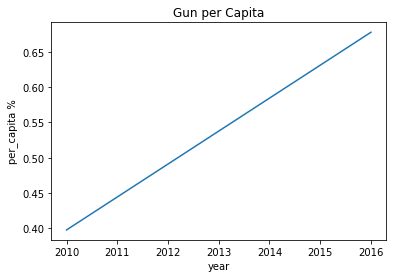

In [54]:
# create chart per capita
year = [2010, 2016]
per_capita = [0.39781331523550745, 0.67779340497762697]

plt.title('Gun per Capita')
plt.xlabel('year')
plt.ylabel('per_capita %')
plt.plot(year, per_capita)
plt.show()

In [55]:
#handgun per capita in 2010
hcapita_2010 = gun_diff['handgun_x'].sum()/census_diff['Population estimates base, April 1, 2010,  (V2016)'].sum()
hcapita_2010

0.001018116178310296

In [56]:
percent(hcapita_2010)

0.10181161783102959

In [57]:
#handgun per capita in 2016
hcapita_2016 = gun_diff['handgun_x'].sum()/census_diff['Population estimates, July 1, 2016,  (V2016)'].sum()
hcapita_2016

0.0009729959185026392

In [58]:
percent(hcapita_2016)

0.09729959185026392

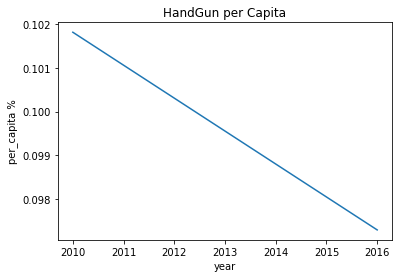

In [59]:
# create chart handgun per capita
year = [2010, 2016]
per_capita = [0.10181161783102959, 0.09729959185026392]

plt.title('HandGun per Capita')
plt.xlabel('year')
plt.ylabel('per_capita %')
plt.plot(year, per_capita)
plt.show()

### Research Question 2  Which state  gun registration highest rank 2010 and 2017?

In [60]:
us_gun = census_diff.merge(gun_diff, on='state', how='left')
us_gun.head()

,state,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)",month_x,handgun_x,long_gun_x,totals_x,month_y,handgun_y,long_gun_y,totals_y
0,index,1.0,0.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,Alabama,4780131.0,4863300.0,2010-04-01,8727.0,8095.0,20791.0,2016-07-01,10132.0,7392.0,48927.0
2,Alaska,710249.0,741894.0,2010-04-01,2650.0,3136.0,6411.0,2016-07-01,2898.0,2816.0,6793.0
3,Arizona,6392301.0,6931071.0,2010-04-01,7787.0,5097.0,16578.0,2016-07-01,13693.0,8643.0,34496.0
4,Arkansas,2916025.0,2988248.0,2010-04-01,3865.0,3833.0,14563.0,2016-07-01,6323.0,5053.0,19378.0


In [61]:
#New table 2017 
usgun17 = g[g['month'] == '2017-09' ]
usgun17.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [62]:
usgun17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 54
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      50 non-null     object 
 1   state                      50 non-null     object 
 2   permit                     50 non-null     float64
 3   permit_recheck             50 non-null     float64
 4   handgun                    50 non-null     float64
 5   long_gun                   50 non-null     float64
 6   other                      50 non-null     float64
 7   multiple                   50 non-null     int64  
 8   admin                      50 non-null     float64
 9   prepawn_handgun            50 non-null     float64
 10  prepawn_long_gun           50 non-null     float64
 11  prepawn_other              50 non-null     float64
 12  redemption_handgun         50 non-null     float64
 13  redemption_long_gun        50 non-null     float64
 

In [63]:
usgun17.sort_values(by=['totals'], axis = 0, ascending = False).head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
18,2017-09,Kentucky,378384.0,0.0,8112.0,7543.0,253.0,543,1.0,16.0,...,0.0,0.0,0.0,21.0,19.0,1.0,2.0,1.0,0.0,398706
46,2017-09,Texas,31390.0,0.0,39119.0,39416.0,2768.0,2473,0.0,59.0,...,0.0,0.0,0.0,121.0,87.0,13.0,2.0,5.0,0.0,128260
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
14,2017-09,Illinois,15712.0,71432.0,18290.0,10201.0,0.0,814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116449
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


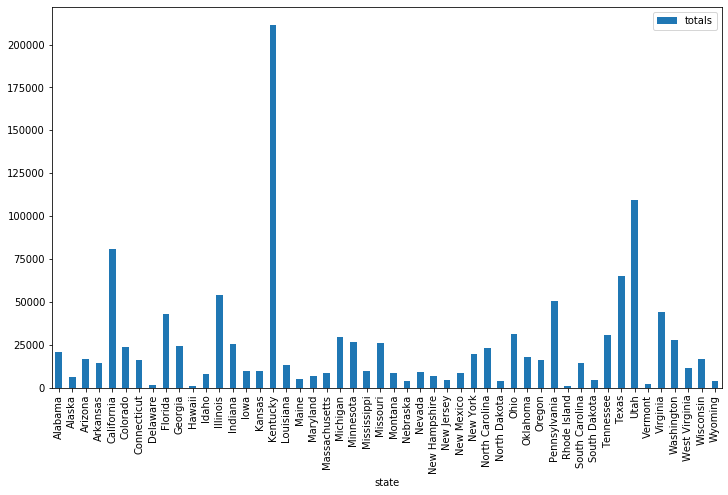

In [64]:
g_2010.plot(x='state', y='totals', kind='bar', figsize=(12, 7));

In [65]:
g_2010.sort_values(by=['totals'], axis = 0, ascending = False).head()

,month,state,handgun,long_gun,totals
16,2010-04-01,Kentucky,6274.0,6352.0,211261
43,2010-04-01,Utah,2379.0,2996.0,109391
4,2010-04-01,California,26170.0,27650.0,80750
42,2010-04-01,Texas,24481.0,21343.0,65012
12,2010-04-01,Illinois,8557.0,8005.0,53929


# Answer top 5 gun registration highest rank 2010 and 2017  


## Highest rank 2010
+ Kentucky
+ Utah
+ California
+ Texas
+ Illinois


## Highest rank 2017
+ Kentucky
+ Texas
+ California
+ Illinois
+ Florida

# Research Question 3 Which state most handgun  in 2016 and 2017?

In [66]:
usgun17.sort_values(by=['handgun'], axis = 0, ascending = False).head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
40,2017-09,Pennsylvania,23144.0,0.0,39825.0,13222.0,48.0,0,179.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77003
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390
46,2017-09,Texas,31390.0,0.0,39119.0,39416.0,2768.0,2473,0.0,59.0,...,0.0,0.0,0.0,121.0,87.0,13.0,2.0,5.0,0.0,128260
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
37,2017-09,Ohio,8741.0,490.0,21085.0,14998.0,1202.0,1026,0.0,9.0,...,0.0,0.0,0.0,58.0,36.0,4.0,1.0,1.0,0.0,49942


In [67]:
g_2016.sort_values(by=['handgun'], axis = 0, ascending = False).head()

,month,state,handgun,long_gun,totals
8,2016-07-01,Florida,57902.0,28000.0,125208
42,2016-07-01,Texas,50499.0,34266.0,127207
37,2016-07-01,Pennsylvania,46843.0,11793.0,86137
4,2016-07-01,California,46361.0,47594.0,190218
34,2016-07-01,Ohio,27876.0,17720.0,63148


In [68]:
h16 = g_2016[['state','handgun']].sort_values(by=['handgun'], axis = 0, ascending = False).head()

In [69]:
h16.set_index('state', inplace=True)  #set state columns as an index

In [70]:
h17 = usgun17[['state','handgun']].sort_values(by=['handgun'], axis = 0, ascending = False).head()

In [71]:
h17.set_index('state', inplace=True)  #set state columns as an index

Text(0, 0.5, 'Gun registration')

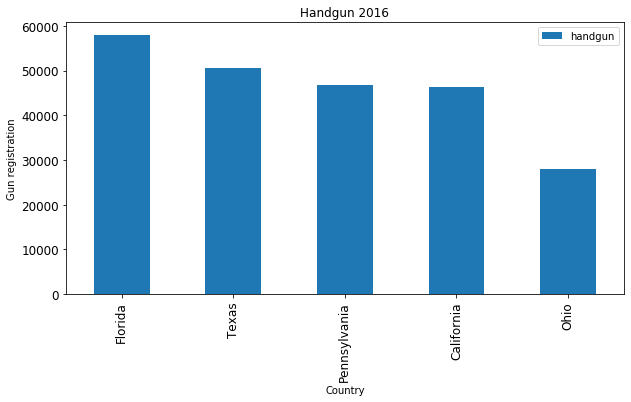

In [72]:
h16.plot(kind='bar',figsize=(10, 5), legend=True, fontsize=12);
plt.title("Handgun 2016")
plt.xlabel("Country")
plt.ylabel("Gun registration")

Text(0, 0.5, 'Gun registration')

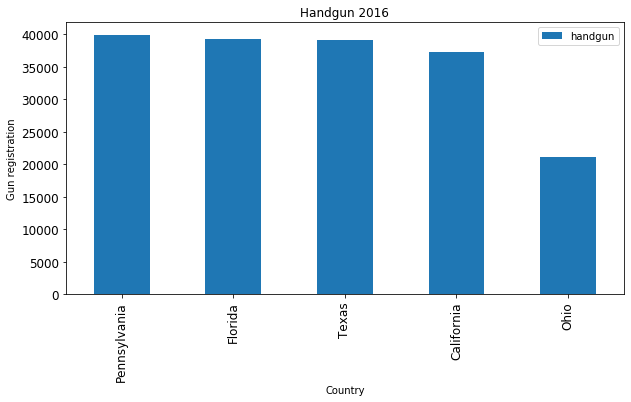

In [73]:
h17.plot(kind='bar',figsize=(10, 5), legend=True, fontsize=12);
plt.title("Handgun 2016")
plt.xlabel("Country")
plt.ylabel("Gun registration")

# Gun trend

In [74]:
usgun17.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [75]:
usgun17['handgun'].sum() 

477315.0

In [76]:
usgun17['long_gun'].sum()

417126.0

In [77]:
usgun17['other'].sum()

26897.0

In [78]:
usgun17['multiple'].sum()

17612

In [79]:
type_gun = ['handgun', 'long_gun', 'other', 'multiple']
total = [477315, 417126,26897,17612]

In [80]:
type_gun1 = np.arange(len(type_gun)) #create array
type_gun1

array([0, 1, 2, 3])

No handles with labels found to put in legend.


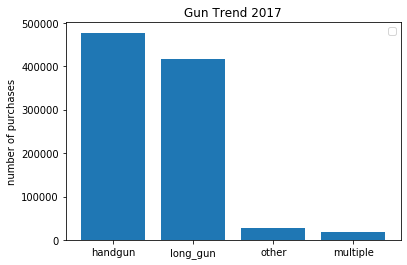

In [81]:
plt.xticks(type_gun1,type_gun)
plt.ylabel('number of purchases')
plt.title('Gun Trend 2017')
plt.bar(type_gun1, total )
plt.legend()

## Conclusions
MY conclusion, The gun and census data shared similar variables such as states and date.I have idea to compare both data by countries and dates.Gun registration per capita 2010 equal 0.39% and 2016 increase to  0.67%.Top 5 state gun registration in 2010  is  Kentucky ,Utah, California ,Texas,Illinois and Top 5 state gun registration in 2017 is Kentucky,Texas,California
Illinois,Florida. Kentucky is city gun in USA.Type of gun trend in 2017 primarily is handgun second longgun and other type.

Some missing data in censusdata such as puerto , guam and other caused problem to calculate and summary data.In my opinion Kentucky has outlier among the state.I calculate data from 2010 ,2016 ,2017 kentucky is higher gun registration than American states.It reasonable to rechek data from Kentucky and some state has outlier problem.
 